<a href="https://colab.research.google.com/github/TetianaMar-888/Python_for_ds_tasks/blob/main/Marinoshenko_Tetiana_HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [13]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [14]:
od.version()

'0.1.22'

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [16]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3/data'

In [17]:
od.download(dataset_url)

Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu-course-c-3" (use force=True to force download)


In [18]:
import os
data_dir = './bank-customer-churn-prediction-dlu-course-c-3'
os.listdir(data_dir)

['train.csv', 'test.csv', 'sample_submission.csv']

In [19]:
train_csv = data_dir + '/train.csv'
test_csv = data_dir + '/test.csv'

In [20]:
train_df_full = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

train_df, val_df = train_test_split(
    train_df_full,
    test_size=0.2,
    random_state=42,
    stratify=train_df_full['Exited']
)


In [21]:
train_df_full.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [22]:
train_df_full.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [23]:
print('test_df.shape :', test_df.shape)
print('train_df_full.shape :', train_df_full.shape)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

test_df.shape : (10000, 13)
train_df_full.shape : (15000, 14)
train_df.shape : (12000, 14)
val_df.shape : (3000, 14)


# Набір даних містить 15000 рядків та 14 стовпців. Набір даних містить стовпці з числовими та категоріальними даними. Всі рядки з заповненими даними.

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [24]:
input_cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target_col = 'Exited'

In [25]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [26]:
import numpy as np

In [27]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [28]:
numeric_cols, categorical_cols

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender'])

In [29]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,658.84,37.69,5.03,43008.17,1.59,0.79,0.49,117992.40
std,72.33,8.14,2.78,59906.63,0.53,0.41,0.50,45589.48
min,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83343.73
50%,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123613.91
75%,708.00,42.00,7.00,109949.05,2.00,1.00,1.00,156912.81
max,850.00,74.00,10.00,209767.31,4.00,1.00,1.00,199992.48


In [30]:
train_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [31]:
print(train_df_full.shape)
train_df_full[numeric_cols].isna().sum()

(15000, 14)


,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
?MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(train_df_full[numeric_cols])

MinMaxScaler()

In [36]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [37]:
#перевіряємо чи значення в кожному стовпці лежать в діапазоні (0,1)
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.54,0.35,0.50,0.21,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.29,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.34,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.43,0.70,0.52,0.33,1.00,1.00,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [38]:
train_df_full[categorical_cols].nunique()

,0
Geography,3
Gender,2


In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
?OneHotEncoder

In [41]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [42]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [43]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [44]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [45]:
encoder.transform(train_inputs[categorical_cols])[:10]

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [46]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [47]:
train_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.482100,France,Female,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
8463,0.577566,France,Female,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,1.0,0.0
8143,0.453461,France,Male,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0
11512,0.379475,Spain,Male,0.428571,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,0.0,1.0


In [48]:
#перевіряємо, що нові стовпці були додані до навчальних та валідаційних наборів
pd.set_option('display.max_columns', None)
display(train_inputs.head())
display(val_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [49]:
print('train_inputs.shape :', train_inputs.shape)
print('train_targets.shape :', train_targets.shape)
print('val_inputs.shape :', val_inputs.shape)
print('val_targets.shape :', val_targets.shape)

train_inputs.shape : (12000, 15)
train_targets.shape : (12000,)
val_inputs.shape : (3000, 15)
val_targets.shape : (3000,)


In [50]:
!pip install pyarrow --quiet

In [51]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [52]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

CPU times: user 23 ms, sys: 570 µs, total: 23.6 ms
Wall time: 26.8 ms


In [53]:
%%time
#зчитуємо дані
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

CPU times: user 39.8 ms, sys: 13.5 ms, total: 53.2 ms
Wall time: 97 ms


In [54]:
#перевіряємо чи правильно завантажені дані
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (12000, 15)
train_targets: (12000,)
val_inputs: (3000, 15)
val_targets: (3000,)


In [55]:
val_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,0.0,1.0
3646,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,0.0,1.0
5306,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,1.0,0.0
652,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,1.0,0.0
2627,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,0.589499,France,Male,0.357143,0.4,0.000000,0.333333,1.0,0.0,0.667682,1.0,0.0,0.0,0.0,1.0
8866,0.768496,France,Male,0.642857,0.6,0.000000,0.000000,1.0,0.0,0.885353,1.0,0.0,0.0,0.0,1.0
3244,0.589499,Spain,Male,0.250000,0.5,0.000000,0.333333,1.0,0.0,0.883589,0.0,0.0,1.0,0.0,1.0
12441,0.699284,Spain,Male,0.267857,0.5,0.658646,0.000000,1.0,0.0,0.528593,0.0,0.0,1.0,0.0,1.0


In [56]:
val_targets

,Exited
6490,1.0
3646,0.0
5306,0.0
652,0.0
2627,0.0
...,...
10550,0.0
8866,1.0
3244,0.0
12441,0.0


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [57]:
#Навчаємо модель логістичної регресії
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression(solver='liblinear')

In [59]:
#тренуємо також за допомогою model.fit
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [60]:
print(numeric_cols + encoded_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [61]:
model.coef_.round(2)

array([[-0.87,  8.45, -0.08, -1.1 , -3.93, -0.19, -1.25,  0.19, -0.96,
         0.61, -1.05, -0.27, -1.13]])

In [62]:
print(model.coef_.tolist())

[[-0.8727057654948849, 8.451461197130401, -0.07507593826903385, -1.095227113484121, -3.934637049980205, -0.18752677354595151, -1.2534613460000872, 0.18932980315740233, -0.9601551360076453, 0.6079395180143473, -1.0533218301540488, -0.2721184810439519, -1.1334189671031802]]


In [63]:
print(model.intercept_)

[-1.40553745]


In [64]:
#Прогнозуємо та оцінюємо модель
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [65]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.599045,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.603819,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.653938,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.568019,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.658711,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0


In [66]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [67]:
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
train_targets

,Exited
7180,0.0
10393,0.0
80,0.0
3365,0.0
12236,0.0
...,...
9493,0.0
8463,0.0
8143,0.0
11512,0.0


In [69]:
train_probs = model.predict_proba(X_train)
val_probs = model.predict_proba(X_val)

In [70]:
train_probs

array([[0.98535823, 0.01464177],
       [0.72907259, 0.27092741],
       [0.87240654, 0.12759346],
       ...,
       [0.9927604 , 0.0072396 ],
       [0.83156063, 0.16843937],
       [0.94951586, 0.05048414]])

In [71]:
train_probs[:,1]

array([0.01464177, 0.27092741, 0.12759346, ..., 0.0072396 , 0.16843937,
       0.05048414])

In [72]:
np.max(train_probs, axis=1)

array([0.98535823, 0.72907259, 0.87240654, ..., 0.9927604 , 0.83156063,
       0.94951586])

In [73]:
np.argmax(train_probs, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
import matplotlib.pyplot as plt

(array([6333., 1943.,  916.,  616.,  481.,  414.,  316.,  319.,  360.,
         302.]),
 array([0.00141861, 0.10051377, 0.19960893, 0.29870408, 0.39779924,
        0.49689439, 0.59598955, 0.6950847 , 0.79417986, 0.89327501,
        0.99237017]),
 <BarContainer object of 10 artists>)

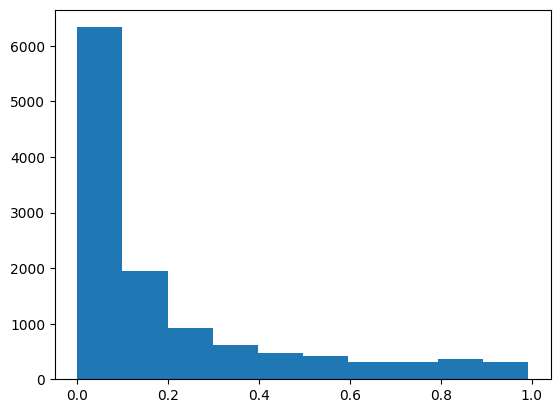

In [75]:
import matplotlib.pyplot as plt
plt.hist(train_probs[:,1])

In [76]:
(train_probs[:,1].round(2) [:20]>0.2).astype(int)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [77]:
train_probs[:,1].round(2)[:20] #>0.2).astype(int)

array([0.01, 0.27, 0.13, 0.36, 0.  , 0.12, 0.14, 0.77, 0.09, 0.44, 0.02,
       0.04, 0.07, 0.02, 0.02, 0.21, 0.07, 0.81, 0.02, 0.03])

In [78]:
(train_probs[:,1].round(2) [:20]>0.5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [79]:
train_targets.value_counts(normalize=True)

,proportion
Exited,
0.0,0.7965
1.0,0.2035


In [80]:
model.classes_

array([0., 1.])

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(train_targets, train_preds)

0.87425

Модель досягає точності 87,4% на навчальному наборі.

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [83]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score

In [84]:
confusion_matrix(train_targets, train_preds)

array([[9177,  381],
       [1128, 1314]])

In [85]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.9601381 , 0.0398619 ],
       [0.46191646, 0.53808354]])

In [86]:
import seaborn as sns

In [87]:
def predict_and_plot(inputs, targets, name=''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))

  cf = confusion_matrix(targets, preds, normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name));

  return preds

Accuracy: 87.42%


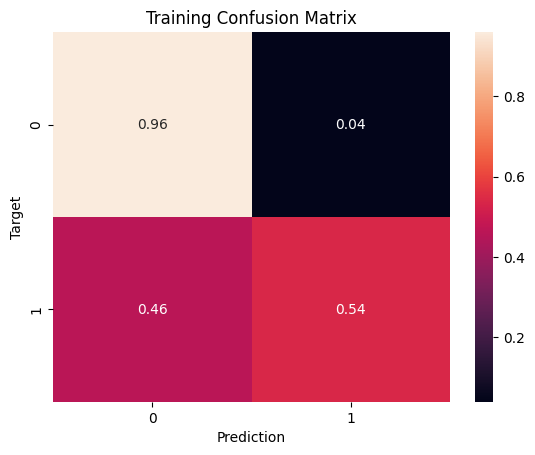

In [88]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 87.17%


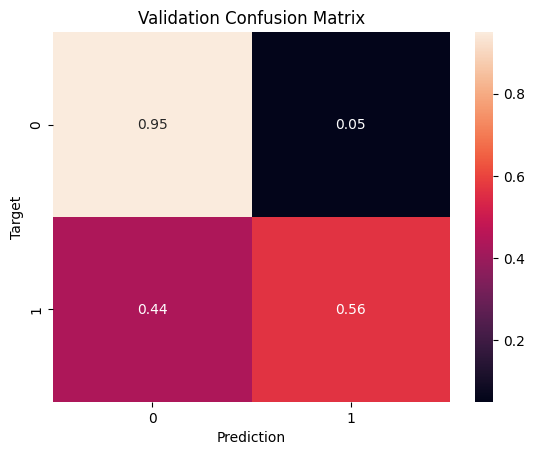

In [89]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

In [90]:
from sklearn.metrics import f1_score

In [91]:
preds = model.predict(X_train)
print(preds[:5], train_targets[:5])
f1_score(train_targets, preds)

[0. 0. 0. 0. 0.] 7180     0.0
10393    0.0
80       0.0
3365     0.0
12236    0.0
Name: Exited, dtype: float64


0.6352429296591733

In [92]:
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds)
  print(f"F1 score {name}: {f1_score_:.2f}")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.64
F1 score Validation: 0.64


In [93]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  #Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  #Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)

  #Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  #Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Rceiver Operating Characteristics (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.88


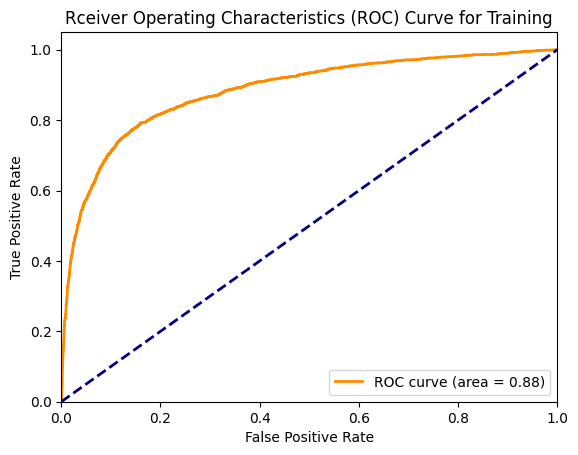

AUROC for Validation: 0.88


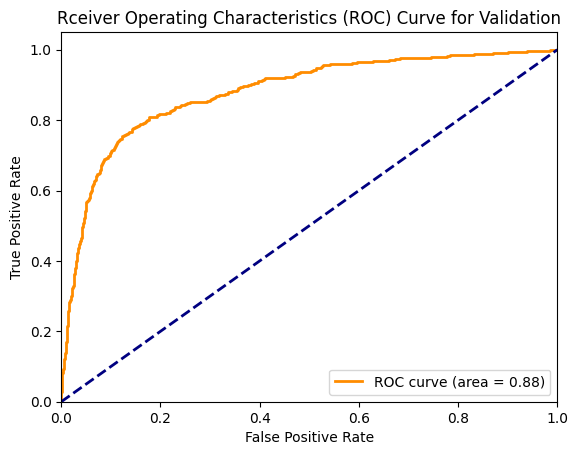

In [94]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

# Модель хороша. Показники як на тренувальних так і на валідаційних даних хороші.
F1 score Training: 0.64

F1 score Validation: 0.64

AUROC for Training: 0.88

AUROC for Validation: 0.88

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [146]:
# Знаходимо мажоритарний клас у тренувальних даних
majority_class = train_targets.mode()[0]

# Створюємо передбачення для "мажоритарної" моделі
# Для тренувальних даних
majority_train_preds = pd.Series(majority_class, index=train_targets.index)
# Для валідаційних даних
majority_val_preds = pd.Series(majority_class, index=val_targets.index)

# Рахуємо Accuracy для "мажоритарної" моделі
majority_train_accuracy = accuracy_score(train_targets, majority_train_preds)
majority_val_accuracy = accuracy_score(val_targets, majority_val_preds)

print(f"Majority Class Model Accuracy (Training): {majority_train_accuracy:.2f}")
print(f"Majority Class Model Accuracy (Validation): {majority_val_accuracy:.2f}")

# Рахуємо Accuracy для моделі з п.6
model_train_accuracy = accuracy_score(train_targets, train_preds)
model_val_accuracy = accuracy_score(val_targets, val_preds)

print(f"Logistic Regression Model Accuracy (Training): {model_train_accuracy:.2f}")
print(f"Logistic Regression Model Accuracy (Validation): {model_val_accuracy:.2f}")

# Висновок про якість моделі
print("\nВисновки про якість моделі:")
if model_val_accuracy > majority_val_accuracy:
    print("Якість нашої моделі задовільна або хороша, оскільки її точність на валідаційних даних значно вища, ніж у моделі, яка завжди передбачає мажоритарний клас.")
elif model_val_accuracy == majority_val_accuracy:
    print("Якість нашої моделі задовільна. Її точність на валідаційних даних така ж, як і у моделі, що передбачає мажоритарний клас. Це може свідчити про обмеженість моделі або даних.")
else:
    print("Якість нашої моделі погана, оскільки її точність на валідаційних даних нижча, ніж у моделі, що завжди передбачає мажоритарний клас. Це вказує на те, що модель не навчається ефективно.")

# Додатково можна порівняти F1 score або AUROC для більш повної картини,
# оскільки Accuracy може бути оманливою при незбалансованих даних.
# Як видно з попереднього кроку, F1 та AUROC нашої моделі значно вищі за те,
# що могла б дати "мажоритарна" модель (для бінарної класифікації мажоритарна
# модель матиме F1 для міноритарного класу рівний 0, а AUROC буде 0.5).
print(f"\nПорівняння з метриками з п.7:")
print(f"Logistic Regression Model F1 Score (Validation): {f1_score(val_targets, val_preds):.2f}")
print(f"Logistic Regression Model AUROC (Validation): {roc_auc_score(val_targets, model.predict_proba(X_val)[:, 1]):.2f}")
print("Модель, яка завжди передбачає мажоритарний клас, матиме F1-Score для міноритарного класу 0 та AUROC близько 0.5.")
print("На основі F1-Score та AUROC наша модель значно перевершує базову модель, що робить її якість задовільною або хорошою.")

Majority Class Model Accuracy (Training): 0.80
Majority Class Model Accuracy (Validation): 0.80
Logistic Regression Model Accuracy (Training): 0.87
Logistic Regression Model Accuracy (Validation): 0.87

Висновки про якість моделі:
Якість нашої моделі задовільна або хороша, оскільки її точність на валідаційних даних значно вища, ніж у моделі, яка завжди передбачає мажоритарний клас.

Порівняння з метриками з п.7:
Logistic Regression Model F1 Score (Validation): 0.64
Logistic Regression Model AUROC (Validation): 0.88
Модель, яка завжди передбачає мажоритарний клас, матиме F1-Score для міноритарного класу 0 та AUROC близько 0.5.
На основі F1-Score та AUROC наша модель значно перевершує базову модель, що робить її якість задовільною або хорошою.


9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [134]:
import joblib

# Зберігаємо модель та інші об'єкти
joblib.dump(model, 'log_reg.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')
joblib.dump(input_cols, 'input_cols.joblib')
joblib.dump(target_col, 'target_col.joblib')
joblib.dump(numeric_cols, 'numeric_cols.joblib')
joblib.dump(categorical_cols, 'categorical_cols.joblib')
joblib.dump(encoded_cols, 'encoded_cols.joblib')

# Завантажуємо модель з файлу в змінну model_2
model_2 = joblib.load('log_reg.joblib')

# Можна також завантажити інші об'єкти для перевірки
scaler_2 = joblib.load('scaler.joblib')
encoder_2 = joblib.load('encoder.joblib')
numeric_cols_2 = joblib.load('numeric_cols.joblib')
encoded_cols_2 = joblib.load('encoded_cols.joblib')

print("Модель та інші об'єкти збережено та завантажено.")
print("Тип завантаженої моделі:", type(model_2))


Модель та інші об'єкти збережено та завантажено.
Тип завантаженої моделі: <class 'sklearn.linear_model._logistic.LogisticRegression'>


10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [130]:
import warnings
warnings.filterwarnings("ignore")

def predict_train_full_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [145]:
test_raw_df = pd.read_csv(test_csv)

# Use the predict_raw_df function to get predictions
test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df.copy()) # Use .copy() to avoid modifying the original test_raw_df

# Display the first few rows of test_raw_df with the new Exited column
print(test_raw_df.head())

      id  CustomerId     Surname  CreditScore Geography Gender   Age  Tenure  \
0  15000  15594796.0         Chu        584.0   Germany   Male  30.0     2.0   
1  15001  15642821.0       Mazzi        551.0    France   Male  39.0     5.0   
2  15002  15716284.0   Onyekachi        706.0    France   Male  43.0     8.0   
3  15003  15785078.0      Martin        717.0     Spain   Male  45.0     3.0   
4  15004  15662955.0  Kenechukwu        592.0     Spain   Male  43.0     8.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0  146053.66            1.0        1.0             1.0        157891.86   
1       0.00            2.0        1.0             1.0         67431.28   
2       0.00            2.0        1.0             0.0        156768.45   
3       0.00            1.0        1.0             1.0        166909.87   
4       0.00            2.0        1.0             1.0        143681.97   

     Exited  
0  0.075316  
1  0.035366  
2  0.153210  
3  0.194872 

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [143]:
sample_submission_df = pd.read_csv(data_dir + '/sample_submission.csv')

# Перевіряємо, що id в test_raw_df та sample_submission_df збігаються
# і що вони в однаковому порядку. Якщо не збігаються, потрібно буде об'єднати
# за стовпцем id. В цьому випадку вони збігаються.
if (test_raw_df['id'] == sample_submission_df['id']).all():
    sample_submission_df['Exited'] = test_raw_df['Exited']
else:
    # Якщо порядок або id не збігаються, потрібно об'єднати
    submission_df = sample_submission_df[['id']].merge(
        test_raw_df[['id', 'Exited']],
        on='id',
        how='left'
    )
    sample_submission_df['Exited'] = submission_df['Exited']


# Виводимо перші 5 рядків фінального датасету
print(sample_submission_df.head())

# Зберігаємо результат в файл submission_log_reg.csv без індексів
sample_submission_df.to_csv('submission_log_reg.csv', index=False)

print("\nФайл submission_log_reg.csv збережено.")
print("Тепер цей файл можна завантажити на Kaggle для submission.")

      id    Exited
0  15000  0.075316
1  15001  0.035366
2  15002  0.153210
3  15003  0.194872
4  15004  0.055660

Файл submission_log_reg.csv збережено.
Тепер цей файл можна завантажити на Kaggle для submission.
